In [1]:
%cd ../

/home/users/dmoreno2016/VisionTransformers


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [30]:
all_bands = {
    'u': 0, 
    'g': 1, 
    'r': 2, 
    'i': 3, 
    'z': 4, 
    'Y': 5,
}

dict_columns = {
  'snid': 'SNID',
  'mjd': 'MJD',
  'flux': 'FLUXCAL',
  'flux_err': 'FLUXCALERR',
  'photflag': 'PHOTFLAG',
  'band': 'BAND', 
  'label': 'label',
}

config = {
  'norm_name': 'minmax_by_obj',
  'use_err': False
  }

In [23]:
band_name = dict_columns['band']

df = pd.read_parquet('data/lightcurves/elasticc_1/raw/lc_Cepheid.parquet')
df_md = pd.read_parquet('data/lightcurves/elasticc_1/raw/features_Cepheid.parquet')

grouped = df.groupby('SNID')
first_detection_mjd = grouped.apply(lambda x: x[x['PHOTFLAG'].isin([4096, 6144])]['MJD'].min())
last_detection_mjd = grouped.apply(lambda x: x[x['PHOTFLAG'].isin([4096, 6144])]['MJD'].max())
df['first_detection_mjd'] = df['SNID'].map(first_detection_mjd)
df['last_detection_mjd'] = df['SNID'].map(last_detection_mjd)
df = df[(df['MJD'] >= df['first_detection_mjd'] - 30) & 
        (df['MJD'] <= df['last_detection_mjd'])]
df = df.drop(columns=['first_detection_mjd', 'last_detection_mjd'])
df[band_name] = df[band_name].replace(all_bands)
df

/tmp/ipykernel_1408354/1433467041.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  first_detection_mjd = grouped.apply(lambda x: x[x['PHOTFLAG'].isin([4096, 6144])]['MJD'].min())
/tmp/ipykernel_1408354/1433467041.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  last_detection_mjd = grouped.apply(lambda x: x[x['PHOTFLAG'].isin([4096, 6144])]['MJD'].max())
/tmp/ipykernel_1408354/1433467041.py:14: Future

,SNID,MJD,BAND,CCDNUM,FIELD,PHOTFLAG,PHOTPROB,FLUXCAL,FLUXCALERR,PSF_SIG1,...,SKY_SIG,SKY_SIG_T,RDNOISE,ZEROPT,ZEROPT_ERR,GAIN,XPIX,YPIX,SIM_FLUXCAL_HOSTERR,SIM_MAGOBS
0,1000000163906,60275.3353,4,-9,VOID,0,-9.0,211.776260,26.693672,1.59,...,62.860001,0.0,0.25,31.0,0.005,1.0,-9.0,-9.0,0.0,17.228798
1,1000000202390,60275.3353,4,-9,VOID,6144,-9.0,-7286.261719,45.290318,1.59,...,62.860001,0.0,0.25,31.0,0.005,1.0,-9.0,-9.0,0.0,16.891592
2,100000056180,60275.3357,4,-9,VOID,6144,-9.0,-1856.723022,21.396349,1.61,...,64.750000,0.0,0.25,31.0,0.005,1.0,-9.0,-9.0,0.0,18.452839
3,100000040417,60275.3357,4,-9,VOID,6144,-9.0,-37371.125000,189.829651,1.61,...,64.750000,0.0,0.25,31.0,0.005,1.0,-9.0,-9.0,0.0,14.537477
4,10000008373,60275.3357,4,-9,VOID,6144,-9.0,10698.102539,94.489075,1.61,...,64.750000,0.0,0.25,31.0,0.005,1.0,-9.0,-9.0,0.0,14.508128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4949514,100000073683,61379.3555,2,-9,VOID,4096,-9.0,-174.508743,12.014482,2.07,...,35.320000,0.0,0.25,31.6,0.005,1.0,-9.0,-9.0,0.0,18.317574
4949515,1000000289869,61379.3560,2,-9,VOID,4096,-9.0,747.212830,16.743624,2.09,...,35.439999,0.0,0.25,31.6,0.005,1.0,-9.0,-9.0,0.0,17.484518
4949517,1000000294451,61379.3560,2,-9,VOID,4096,-9.0,120.946190,6.713919,2.09,...,35.439999,0.0,0.25,31.6,0.005,1.0,-9.0,-9.0,0.0,21.054541
4949519,1000000218295,61379.3560,2,-9,VOID,4096,-9.0,-2073.651611,14.617610,2.09,...,35.439999,0.0,0.25,31.6,0.005,1.0,-9.0,-9.0,0.0,18.583035


In [31]:
def min_max_normalize_lc(group, dict_columns):
    for col in [dict_columns['flux'], dict_columns['flux_err'], dict_columns['mjd']]:
        group[col] = (group[col] - group[col].min()) / (group[col].max() - group[col].min())
    return group

def get_normalization(df, norm_name, dict_columns):
    if norm_name == 'minmax_by_obj':
        return df.groupby([dict_columns['snid']]).apply(min_max_normalize_lc, dict_columns=dict_columns).reset_index(drop=True)
    else:
        raise 'The selected normalization has not been implemented...'

df = get_normalization(df, config['norm_name'], dict_columns)

/tmp/ipykernel_1408354/4291668076.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby([dict_columns['snid']]).apply(min_max_normalize_lc, dict_columns=dict_columns).reset_index(drop=True)


In [183]:
fig_params = {
    #'figsize': [3.84, 3.84],
    'figsize': [2.24, 2.24],
    'fmt': '-o', #-o
    'markersize': 3, # 2.5,
    'linewidth': 1.5, # 1.2,
    'colors': {
      0: '#00FF7F',  # Cercano al verde
      1: '#7FFF00',  # Cercano al verde
      2: '#FF007F',  # Cercano al rojo
      3: '#FF7F00',  # Cercano al rojo
      4: '#007FFF',  # Cercano al azul
      5: '#7F00FF',   # Cercano al azul
    },
    'alpha': 0.5,
    'ylim': [-0.05, 1.05],
}

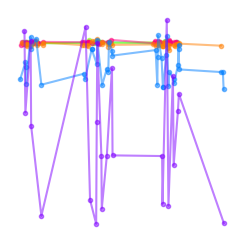

In [184]:
for i, obj_id in enumerate(df[dict_columns['snid']].unique()):
    obj_df = df[df[dict_columns['snid']] == obj_id]

    # Generar la imagen
    fig = plt.figure(figsize=(fig_params['figsize']))
    ax = fig.add_subplot(1, 1, 1)
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

    for j in range(len(all_bands)):
        band_data = obj_df[obj_df[dict_columns['band']] == j]

        if band_data.empty:
            ax.add_patch(patches.Rectangle((0, 0), 1, 1, color='white', transform=ax.transAxes))
        else:
            ax.errorbar(band_data[dict_columns['mjd']], 
                        band_data[dict_columns['flux']], 
                        yerr=band_data[dict_columns['flux_err']] if config['use_err'] else None,
                        color=fig_params['colors'][j],
                        fmt=fig_params['fmt'], 
                        alpha=fig_params['alpha'], 
                        markersize=fig_params['markersize'], 
                        linewidth=fig_params['linewidth'])

        ax.set_ylim(fig_params['ylim'])
        ax.axis('off')

    plt.show()

    break

In [185]:
all_bands

{'u': 0, 'g': 1, 'r': 2, 'i': 3, 'z': 4, 'Y': 5}

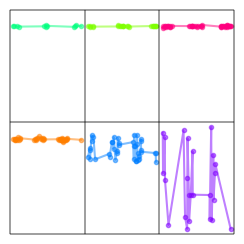

In [186]:
fig, axs = plt.subplots(2, 3, figsize=(2.24, 2.24))  # Dos filas y tres columnas
for band_key, j in all_bands.items():
    row, col = divmod(j, 3)
    band_data = obj_df[obj_df[dict_columns['band']] == j]

    if band_data.empty:
        axs[row, col].add_patch(patches.Rectangle((0, 0), 1, 1, color='white', transform=axs[row, col].transAxes))
    else:
        axs[row, col].errorbar(band_data[dict_columns['mjd']], 
                               band_data[dict_columns['flux']], 
                               yerr=band_data[dict_columns['flux_err']] if config['use_err'] else None,
                               color=fig_params['colors'][j],
                               fmt=fig_params['fmt'], 
                               alpha=fig_params['alpha'], 
                               markersize=fig_params['markersize'], 
                               linewidth=fig_params['linewidth'])

    axs[row, col].set_ylim(fig_params['ylim'])
    axs[row, col].axis('off')

plt.subplots_adjust(left=0, right=1, top=1, bottom=0, wspace=0, hspace=0)

# Agregar rectángulos para las columnas
for col in range(3):
    rect = patches.Rectangle((col/3, 0), 1/3, 1, linewidth=0.3, edgecolor='black', facecolor='none', transform=fig.transFigure)
    fig.add_artist(rect)

# Agregar rectángulos para las filas
for row in range(2):
    rect = patches.Rectangle((0, row/2), 1, 0.5, linewidth=0.3, edgecolor='black', facecolor='none', transform=fig.transFigure)
    fig.add_artist(rect)

plt.show()

In [198]:
dict_columns = {
    'snid': 'lcid',
    'mjd': 'mjd',
    'flux': 'flux',
    'flux_err': 'flux_err',
    # photflag': 'detected',
    # band': 'passband',
    'label': 'label'
}


chunk_0 = pd.read_pickle('data/lightcurves/astromer/alcock/fold_0/alcock_20/train/Cep_0/chunk_0.pkl')
chunk_0 = chunk_0.explode('lc_data')
chunk_0[['mjd', 'flux', 'flux_err']] = pd.DataFrame(chunk_0['lc_data'].tolist(), 
                                                    index=chunk_0.index)

# I removed the negative error magnitudes because it doesn't make sense
chunk_0 = chunk_0[chunk_0['flux_err'] >= 0]     
chunk_0 = get_normalization(chunk_0, config['norm_name'], dict_columns)
chunk_0

/tmp/ipykernel_1408354/4291668076.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby([dict_columns['snid']]).apply(min_max_normalize_lc, dict_columns=dict_columns).reset_index(drop=True)


,lcid,lc_data,label,mjd,flux,flux_err
0,b'1.3565.47',"[48824.645, -8.224, 0.008]",0,0.000000,0.641619,0.055556
1,b'1.3565.47',"[48885.605, -8.359, 0.004]",0,0.022438,0.381503,0.011111
2,b'1.3565.47',"[48888.723, -8.359, 0.006]",0,0.023585,0.381503,0.033333
3,b'1.3565.47',"[48896.758, -8.084, 0.007]",0,0.026542,0.911369,0.044444
4,b'1.3565.47',"[48908.445, -8.187, 0.004]",0,0.030844,0.712909,0.011111
...,...,...,...,...,...,...
9734,b'82.8408.27',"[51514.684, -8.05, 0.004]",0,0.987881,0.732719,0.022472
9735,b'82.8408.27',"[51526.586, -8.098, 0.003]",0,0.992408,0.622121,0.011236
9736,b'82.8408.27',"[51531.64, -8.004, 0.006]",0,0.994331,0.838710,0.044944
9737,b'82.8408.27',"[51541.574, -8.19, 0.003]",0,0.998110,0.410139,0.011236


In [211]:
fig_params = {
    #'figsize': [3.84, 3.84],
    'figsize': [2.24, 2.24],
    'fmt': '-o', #-o
    'markersize': 2, # 2.5,
    'linewidth': 0.5, # 1.2,
    'colors': {
      0: '#00FF7F',  # Cercano al verde
      1: '#7FFF00',  # Cercano al verde
      2: '#FF007F',  # Cercano al rojo
      3: '#FF7F00',  # Cercano al rojo
      4: '#007FFF',  # Cercano al azul
      5: '#7F00FF',   # Cercano al azul
    },
    'alpha': 0.5,
    'ylim': [-0.05, 1.05],
}

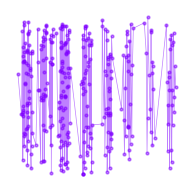

In [212]:
for i, obj_id in enumerate(chunk_0[dict_columns['snid']].unique()):
    obj_df = chunk_0[chunk_0[dict_columns['snid']] == obj_id]

    plt.figure(figsize=fig_params['figsize'])
    plt.errorbar(obj_df[dict_columns['mjd']], 
                obj_df[dict_columns['flux']],
                yerr=obj_df[dict_columns['flux_err']] if config['use_err'] else None,
                color=list(fig_params['colors'].values())[-1], 
                fmt=fig_params['fmt'], 
                alpha=fig_params['alpha'], 
                markersize=fig_params['markersize'],
                linewidth=fig_params['linewidth'])
    plt.axis('off')
    plt.ylim(fig_params['ylim'])

    plt.show()
    break